# Hi!
1. Team name Warrior Analytics
2. Abeer Khan
3. This notebook is best viewed by enabling the nbextension "Collapsible Headings" which lets me organize my code into subcategories.
4. The input is the same as given by DataForGood EXCEPT no fancy formatting, just save it as a simple csv called "HofSimple.csv"
<br>

<b> TLDR: Insights</b>:

1. Being a donor+volunteer is significantly correlated with having volunteered more number of years
2. Being a donor+volunteer is significantly correlated with being a regular volunteer.
3. Let us call donors+volunteers who have donated a lot in total as better donors+volunteers. These districts have produced better volunteers: N0B, N2J, N2L, N2T, N3B, N2M (less so), 
On the other hand, the districts that have mostly low donation focused donor+volunteers are N2A, N2V. 
Most FSAs did not produce any donor+volunteers (low support so this observation isn’t important). We did not conduct significane tests since support is low. 


# Imports

In [76]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Read data

In [3]:
df = pd.read_csv('HofSimple.csv')

In [4]:
df

,VolunteerID,FSA,AgeGroup,YearsVolunteeredGroup,OccasionalVolunteer,RegularVolunteer,Donor,FirstDonationYear,NumberDonations,SumDonationsGroup,...,dwellings_%-renters,"education_%-no-certificate,-diploma-or-degree",education_%-high-school-diploma,"education_%-postsecondary-certificate,-diploma-or-degree",education_%-apprenticeship-or-trades-certificate-or-diploma,education_%-college-certificate-or-diplome,education_%-bachelor-or-above,labour_force_Participation-rate,labour_force_Employment-rate,labour_force_Unemployment-rate
0,1,N2A,20 - 29,less than 1,1,0,N,NaN,NaN,NaN,...,0.285330,0.196436,0.289727,0.513836,0.060377,0.224738,0.210692,0.665,0.622,0.064
1,2,N2A,unknown,1 - 3 years,1,0,N,NaN,NaN,NaN,...,0.285330,0.196436,0.289727,0.513836,0.060377,0.224738,0.210692,0.665,0.622,0.064
2,3,N2G,30 - 39,1 - 3 years,0,1,N,NaN,NaN,NaN,...,0.665483,0.180243,0.267764,0.551993,0.047227,0.191508,0.299827,0.649,0.596,0.082
3,4,N2V,30 - 39,less than 1,1,0,N,NaN,NaN,NaN,...,0.098811,0.118619,0.235736,0.645646,0.036036,0.178303,0.409535,0.710,0.658,0.074
4,5,N2A,20 - 29,1 - 3 years,0,1,N,NaN,NaN,NaN,...,0.285330,0.196436,0.289727,0.513836,0.060377,0.224738,0.210692,0.665,0.622,0.064
5,6,N2L,40 - 49,less than 1,1,0,N,NaN,NaN,NaN,...,0.535551,0.113381,0.306586,0.580242,0.038766,0.144852,0.377449,0.580,0.532,0.083
6,7,N2L,20 - 29,less than 1,1,0,N,NaN,NaN,NaN,...,0.535551,0.113381,0.306586,0.580242,0.038766,0.144852,0.377449,0.580,0.532,0.083
7,8,N1T,50 - 59,less than 1,1,0,N,NaN,NaN,NaN,...,0.136450,0.187545,0.285663,0.526430,0.056481,0.220130,0.225561,0.724,0.679,0.062
8,9,N1G,30 - 39,less than 1,1,0,N,NaN,NaN,NaN,...,0.320361,0.108460,0.272145,0.619395,0.041750,0.177380,0.381489,0.686,0.640,0.067
9,10,N1R,30 - 39,less than 1,1,0,N,NaN,NaN,NaN,...,0.402605,0.274686,0.328900,0.396270,0.071563,0.203123,0.109296,0.640,0.594,0.071


# Eda

In [6]:
df.describe()

,VolunteerID,OccasionalVolunteer,RegularVolunteer,FirstDonationYear,NumberDonations,"Population,-2016",age_distribution_0-to-14-years,age_distribution_15-to-64-years,age_distribution_65-years-and-over,age_distribution_85-years-and-over,...,dwellings_%-renters,"education_%-no-certificate,-diploma-or-degree",education_%-high-school-diploma,"education_%-postsecondary-certificate,-diploma-or-degree",education_%-apprenticeship-or-trades-certificate-or-diploma,education_%-college-certificate-or-diplome,education_%-bachelor-or-above,labour_force_Participation-rate,labour_force_Employment-rate,labour_force_Unemployment-rate
count,2224.000000,2224.000000,2224.000000,505.000000,505.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,...,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,1112.500000,0.858813,0.141187,2005.869307,11.576238,27493.705963,0.167496,0.682436,0.150197,0.020836,...,0.325138,0.174792,0.280485,0.544737,0.060358,0.201608,0.265391,0.677904,0.634414,0.064936
std,642.157821,0.348293,0.348293,7.579915,18.725636,16033.263632,0.036031,0.027809,0.033891,0.007721,...,0.183666,0.049871,0.025005,0.061955,0.015512,0.032575,0.091232,0.048807,0.052717,0.015076
min,1.000000,0.000000,0.000000,1990.000000,1.000000,7594.000000,0.089000,0.584000,0.049000,0.003000,...,0.067756,0.047471,0.173930,0.346748,0.019844,0.095331,0.079358,0.553000,0.498000,0.032000
25%,556.750000,1.000000,0.000000,1999.000000,2.000000,16900.000000,0.131000,0.669000,0.117000,0.015000,...,0.154370,0.123236,0.262583,0.495417,0.047227,0.178303,0.197016,0.649000,0.595000,0.059000
50%,1112.500000,1.000000,0.000000,2006.000000,4.000000,22844.000000,0.180000,0.687000,0.159000,0.020000,...,0.285330,0.180243,0.289727,0.551871,0.062599,0.203123,0.264511,0.684000,0.640000,0.067000
75%,1668.250000,1.000000,0.000000,2012.000000,13.000000,29858.000000,0.194000,0.704000,0.169000,0.026000,...,0.502679,0.203606,0.295249,0.580242,0.066556,0.225412,0.340014,0.719000,0.672000,0.075000
max,2224.000000,1.000000,1.000000,2019.000000,99.000000,103839.000000,0.263000,0.809000,0.266000,0.049000,...,0.750000,0.372073,0.341387,0.778599,0.115610,0.297757,0.636187,0.804000,0.759000,0.102000


In [27]:
print (df.columns)

Index(['VolunteerID', 'FSA', 'AgeGroup', 'YearsVolunteeredGroup',
       'OccasionalVolunteer', 'RegularVolunteer', 'Donor', 'FirstDonationYear',
       'NumberDonations', 'SumDonationsGroup', 'Population,-2016',
       'age_distribution_0-to-14-years', 'age_distribution_15-to-64-years',
       'age_distribution_65-years-and-over',
       'age_distribution_85-years-and-over',
       'age_Average-age-of-the-population', 'age_Median-age-of-the-population',
       'family_%-married-or-living-common-law',
       'family_Average-size-of-census-families',
       'family_%-census-families-that-are-couples',
       'family_%-couples-with-children',
       'income_Median-employment-income-in-2015-for-full-year-full-time-workers-over-15-($)',
       'income_Average-employment-income-in-2015-for-full-year-full-time-workers-over-15-($)',
       'income_Median-total-income-of-households-in-2015-($)',
       'income_Prevalence-of-low-income-based-on-the-Low-income-measure,-after-tax-(LIM-AT)-(%)',
 

# Reformat data - normalize it

In [60]:
fsaDf = df[[
    'FSA',
    'Population,-2016',
       'age_distribution_0-to-14-years', 'age_distribution_15-to-64-years',
       'age_distribution_65-years-and-over',
       'age_distribution_85-years-and-over',
       'age_Average-age-of-the-population', 'age_Median-age-of-the-population',
       'family_%-married-or-living-common-law',
       'family_Average-size-of-census-families',
       'family_%-census-families-that-are-couples',
       'family_%-couples-with-children',
       'income_Median-employment-income-in-2015-for-full-year-full-time-workers-over-15-($)',
       'income_Average-employment-income-in-2015-for-full-year-full-time-workers-over-15-($)',
       'income_Median-total-income-of-households-in-2015-($)',
       'income_Prevalence-of-low-income-based-on-the-Low-income-measure,-after-tax-(LIM-AT)-(%)',
       'citizenship_%-canadian-citizens', 'citizenship_%-immigrants',
       'dwellings_%-owners', 'dwellings_%-renters',
       'education_%-no-certificate,-diploma-or-degree',
       'education_%-high-school-diploma',
       'education_%-postsecondary-certificate,-diploma-or-degree',
       'education_%-apprenticeship-or-trades-certificate-or-diploma',
       'education_%-college-certificate-or-diplome',
       'education_%-bachelor-or-above', 'labour_force_Participation-rate',
       'labour_force_Employment-rate', 'labour_force_Unemployment-rate'
]]
print (len(fsaDf))
fsaDf = fsaDf.drop_duplicates().reset_index(drop=True)
print (len(fsaDf))
print (len(fsaDf['FSA'].unique()))
fsaDf

2224
82
82


,FSA,"Population,-2016",age_distribution_0-to-14-years,age_distribution_15-to-64-years,age_distribution_65-years-and-over,age_distribution_85-years-and-over,age_Average-age-of-the-population,age_Median-age-of-the-population,family_%-married-or-living-common-law,family_Average-size-of-census-families,...,dwellings_%-renters,"education_%-no-certificate,-diploma-or-degree",education_%-high-school-diploma,"education_%-postsecondary-certificate,-diploma-or-degree",education_%-apprenticeship-or-trades-certificate-or-diploma,education_%-college-certificate-or-diplome,education_%-bachelor-or-above,labour_force_Participation-rate,labour_force_Employment-rate,labour_force_Unemployment-rate
0,N2A,29858.0,0.186,0.654,0.161,0.020,39.8,39.5,0.595806,3.0,...,0.285330,0.196436,0.289727,0.513836,0.060377,0.224738,0.210692,0.665,0.622,0.064
1,N2G,13407.0,0.110,0.721,0.169,0.025,41.8,38.9,0.447799,2.6,...,0.665483,0.180243,0.267764,0.551993,0.047227,0.191508,0.299827,0.649,0.596,0.082
2,N2V,16900.0,0.192,0.704,0.104,0.017,37.3,38.1,0.635798,3.2,...,0.098811,0.118619,0.235736,0.645646,0.036036,0.178303,0.409535,0.710,0.658,0.074
3,N2L,27758.0,0.121,0.710,0.169,0.026,39.2,33.3,0.466079,2.8,...,0.535551,0.113381,0.306586,0.580242,0.038766,0.144852,0.377449,0.580,0.532,0.083
4,N1T,17670.0,0.211,0.688,0.101,0.010,36.4,36.8,0.634505,3.3,...,0.136450,0.187545,0.285663,0.526430,0.056481,0.220130,0.225561,0.724,0.679,0.062
5,N1G,27330.0,0.149,0.670,0.180,0.033,40.7,39.0,0.556344,2.9,...,0.320361,0.108460,0.272145,0.619395,0.041750,0.177380,0.381489,0.686,0.640,0.067
6,N1R,42210.0,0.163,0.661,0.176,0.023,41.3,41.6,0.549250,2.8,...,0.402605,0.274686,0.328900,0.396270,0.071563,0.203123,0.109296,0.640,0.594,0.071
7,N2C,16111.0,0.148,0.690,0.162,0.023,39.8,37.0,0.504554,2.7,...,0.609204,0.239442,0.295249,0.464932,0.070513,0.219457,0.159125,0.647,0.592,0.085
8,N2K,27253.0,0.188,0.696,0.117,0.012,38.2,39.5,0.629713,3.1,...,0.160481,0.134070,0.248560,0.617139,0.057821,0.203870,0.340014,0.726,0.691,0.048
9,N2M,33221.0,0.162,0.682,0.156,0.020,39.9,38.2,0.526042,2.8,...,0.501549,0.223129,0.290738,0.486134,0.064528,0.195577,0.210803,0.649,0.595,0.084


In [62]:
volDf = df[[
    'VolunteerID', 'FSA', 'AgeGroup', 'YearsVolunteeredGroup',
       'OccasionalVolunteer', 'RegularVolunteer', 'Donor', 'FirstDonationYear',
       'NumberDonations', 'SumDonationsGroup'
]]
print (len(volDf))
volDf = volDf.drop_duplicates().reset_index(drop=True)
print (len(volDf))
print (len(volDf['FSA'].unique()))
print (len(volDf['VolunteerID'].unique()))
volDf

2224
2224
82
2224


,VolunteerID,FSA,AgeGroup,YearsVolunteeredGroup,OccasionalVolunteer,RegularVolunteer,Donor,FirstDonationYear,NumberDonations,SumDonationsGroup
0,1,N2A,20 - 29,less than 1,1,0,N,NaN,NaN,NaN
1,2,N2A,unknown,1 - 3 years,1,0,N,NaN,NaN,NaN
2,3,N2G,30 - 39,1 - 3 years,0,1,N,NaN,NaN,NaN
3,4,N2V,30 - 39,less than 1,1,0,N,NaN,NaN,NaN
4,5,N2A,20 - 29,1 - 3 years,0,1,N,NaN,NaN,NaN
5,6,N2L,40 - 49,less than 1,1,0,N,NaN,NaN,NaN
6,7,N2L,20 - 29,less than 1,1,0,N,NaN,NaN,NaN
7,8,N1T,50 - 59,less than 1,1,0,N,NaN,NaN,NaN
8,9,N1G,30 - 39,less than 1,1,0,N,NaN,NaN,NaN
9,10,N1R,30 - 39,less than 1,1,0,N,NaN,NaN,NaN


# Is being a donor + volunteer correlated with some other volunteer characteristics?
Distributions & significance tests - donVolDf vs onlyVolDf <br>
If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.<br>
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

In [70]:
donVolDf = volDf[volDf['Donor']=='Y'].reset_index(drop=True)
donVolDf

,VolunteerID,FSA,AgeGroup,YearsVolunteeredGroup,OccasionalVolunteer,RegularVolunteer,Donor,FirstDonationYear,NumberDonations,SumDonationsGroup
0,11,N2G,30 - 39,less than 1,1,0,Y,2018.0,3.0,$50 - $100
1,13,N2G,50 - 59,1 - 3 years,1,0,Y,2013.0,9.0,"$500 - $2,000"
2,16,N2M,40 - 49,less than 1,1,0,Y,2007.0,4.0,"$500 - $2,000"
3,17,N2M,40 - 49,1 - 3 years,1,0,Y,2007.0,4.0,"$500 - $2,000"
4,18,N2P,40 - 49,less than 1,1,0,Y,2002.0,1.0,$50 - $100
5,19,N2P,40 - 49,less than 1,1,0,Y,2002.0,1.0,$50 - $100
6,32,N2N,40 - 49,1 - 3 years,1,0,Y,2007.0,2.0,$100 - $250
7,33,N2N,50 - 59,1 - 3 years,1,0,Y,2007.0,2.0,$100 - $250
8,36,N3A,70 +,less than 1,1,0,Y,2008.0,1.0,under $50
9,37,N2K,unknown,5 - 10 years,1,0,Y,1999.0,21.0,"$500 - $2,000"


In [71]:
onlyVolDf = volDf[volDf['Donor']=='N'].reset_index(drop=True)
onlyVolDf

,VolunteerID,FSA,AgeGroup,YearsVolunteeredGroup,OccasionalVolunteer,RegularVolunteer,Donor,FirstDonationYear,NumberDonations,SumDonationsGroup
0,1,N2A,20 - 29,less than 1,1,0,N,NaN,NaN,NaN
1,2,N2A,unknown,1 - 3 years,1,0,N,NaN,NaN,NaN
2,3,N2G,30 - 39,1 - 3 years,0,1,N,NaN,NaN,NaN
3,4,N2V,30 - 39,less than 1,1,0,N,NaN,NaN,NaN
4,5,N2A,20 - 29,1 - 3 years,0,1,N,NaN,NaN,NaN
5,6,N2L,40 - 49,less than 1,1,0,N,NaN,NaN,NaN
6,7,N2L,20 - 29,less than 1,1,0,N,NaN,NaN,NaN
7,8,N1T,50 - 59,less than 1,1,0,N,NaN,NaN,NaN
8,9,N1G,30 - 39,less than 1,1,0,N,NaN,NaN,NaN
9,10,N1R,30 - 39,less than 1,1,0,N,NaN,NaN,NaN


## Is being a donor + volunteer correlated with how many years you've volunteered? - yes
YearsVolunteeredGroup

/home/a383khan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


<IPython.core.display.Javascript object>


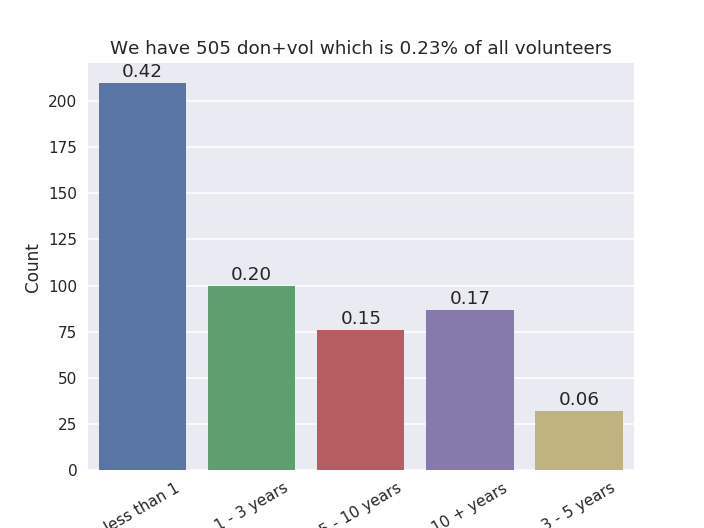

In [194]:
sns.set(style="darkgrid")
g = sns.countplot(x="YearsVolunteeredGroup", data=donVolDf)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
total = float(len(donVolDf))
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
g.set(xlabel='YearsVolunteeredGroup', ylabel='Count')
per = len(donVolDf)/len(df); per = np.round(per, 2)
plt.title('We have '+str(len(donVolDf)) + ' don+vol which is ' + str(per) + '% of all volunteers')
plt.show()

/home/a383khan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


<IPython.core.display.Javascript object>


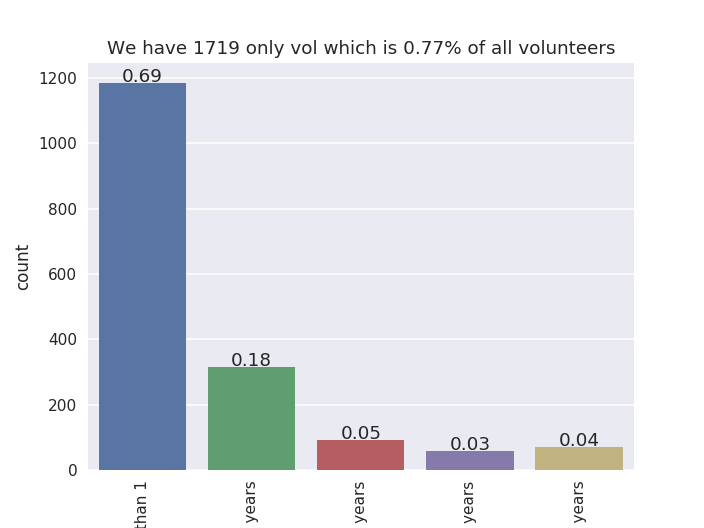

In [193]:
sns.set(style="darkgrid")
g = sns.countplot(x="YearsVolunteeredGroup", data=onlyVolDf)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
total = float(len(onlyVolDf))
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
per = len(onlyVolDf)/len(df); per = np.round(per, 2)
plt.title('We have '+str(len(onlyVolDf)) + ' only vol which is ' + str(per) + '% of all volunteers')
plt.show()

In [171]:
categories = donVolDf['YearsVolunteeredGroup'].unique()
categories.sort()
obs = [ ] #have 2 rows = both donor, volunteer and volunteer only. Have 5 columns

#both donor vluntere
row = []
for cat in categories:
    row.append(len(donVolDf[donVolDf['YearsVolunteeredGroup']==cat]))
obs.append(row)

row = []
for cat in categories:
    row.append(len(onlyVolDf[onlyVolDf['YearsVolunteeredGroup']==cat]))
obs.append(row)

stat, p, dof, expected = chi2_contingency(obs)
print (stat, p, dof, expected)
if p < 0.05:
    print ('Significantly correlated')


217.46210407575222 6.592249430924621e-46 4 [[  94.00629496   32.69784173   23.38803957   37.92041367  316.98741007]
 [ 319.99370504  111.30215827   79.61196043  129.07958633 1079.01258993]]
Significantly correlated


## Is being a donor+volunteer correlate with being a regular volunteer? - yes 

/home/a383khan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


<IPython.core.display.Javascript object>


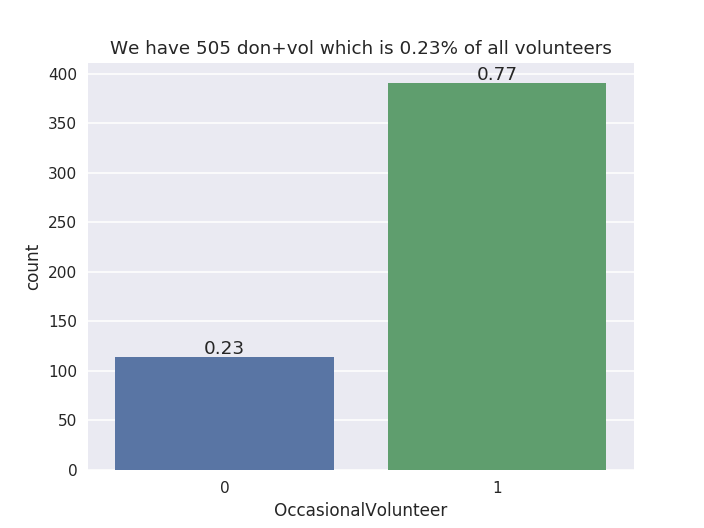

In [195]:
g = sns.countplot(x="OccasionalVolunteer", data=donVolDf)
# g.set_xticklabels(g.get_xticklabels(), rotation=90)
total = float(len(donVolDf))
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
per = len(donVolDf)/len(df); per = np.round(per, 2)
plt.title('We have '+str(len(donVolDf)) + ' don+vol which is ' + str(per) + '% of all volunteers')
plt.show()

/home/a383khan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


<IPython.core.display.Javascript object>


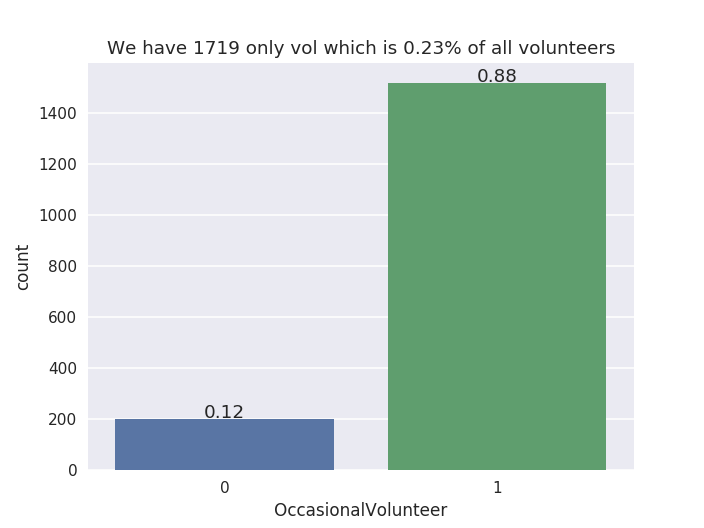

In [196]:
g = sns.countplot(x="OccasionalVolunteer", data=onlyVolDf)
# g.set_xticklabels(g.get_xticklabels(), rotation=90)
total = float(len(onlyVolDf))
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('We have '+str(len(onlyVolDf)) + ' only vol which is ' + str(per) + '% of all volunteers')
plt.show()

In [172]:
categories = donVolDf['OccasionalVolunteer'].unique()
categories.sort()
obs = [ ] #have 2 rows = both donor, volunteer and volunteer only. Have 5 columns

#both donor vluntere
row = []
for cat in categories:
    row.append(len(donVolDf[donVolDf['OccasionalVolunteer']==cat]))
obs.append(row)

row = []
for cat in categories:
    row.append(len(onlyVolDf[onlyVolDf['OccasionalVolunteer']==cat]))
obs.append(row)

stat, p, dof, expected = chi2_contingency(obs)
print (stat, p, dof, expected)
if p < 0.05:
    print ('Significantly correlated')


37.62790910119151 8.561075489286502e-10 1 [[  71.29946043  433.70053957]
 [ 242.70053957 1476.29946043]]
Significantly correlated


# Focusing on donors + volunteers, what makes a better (high paying) donor?
Distributions and significance tests - within donVolDf, what makes a better (high paying) donor?

## Overall, these are how much donors tend to pay

/home/a383khan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


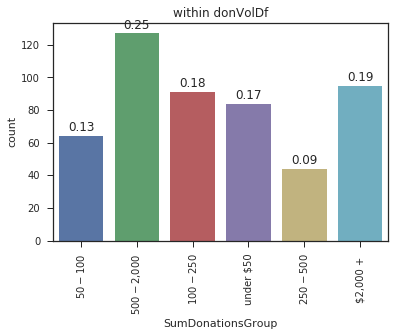

In [88]:
g = sns.countplot(x="SumDonationsGroup", data=donVolDf)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
total = float(len(donVolDf))
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('within donVolDf')
plt.show()

In [90]:
donVolDf['SumDonationsGroup'].unique()

array(['$50 - $100', '$500 - $2,000', '$100 - $250', 'under $50',
       '$250 - $500', '$2,000 + '], dtype=object)

,VolunteerID,FSA,AgeGroup,YearsVolunteeredGroup,OccasionalVolunteer,RegularVolunteer,Donor,FirstDonationYear,NumberDonations,SumDonationsGroup
15,50,N2L,40 - 49,less than 1,1,0,Y,1997.0,12.0,"$2,000 +"
16,51,N2L,50 - 59,less than 1,1,0,Y,1997.0,12.0,"$2,000 +"
17,52,N2L,20 - 29,less than 1,1,0,Y,1997.0,12.0,"$2,000 +"
21,66,N2H,unknown,1 - 3 years,1,0,Y,1990.0,27.0,"$2,000 +"
30,119,N3B,70 +,1 - 3 years,1,0,Y,1998.0,31.0,"$2,000 +"
31,120,N3B,70 +,10 + years,0,1,Y,1998.0,32.0,"$2,000 +"
33,123,N3B,50 - 59,10 + years,1,0,Y,1998.0,50.0,"$2,000 +"
35,139,N2L,20 - 29,1 - 3 years,1,0,Y,1998.0,15.0,"$2,000 +"
39,155,N2J,60 - 69,1 - 3 years,1,0,Y,1998.0,46.0,"$2,000 +"
41,170,N2J,unknown,10 + years,1,0,Y,2000.0,27.0,"$2,000 +"


## What locations make for better donors?
TLDR:<br>
Let us call donors+volunteers who have donated a lot in total as good donors+volunteers. 
<br>
These districts have produced good volunteers: N0B, N2J, N2L, N2T, N3B, N2M (less so) <br> 
On the other hand, the districts that have mostly low donation focused donor+volunteers are N2A, N2V. <br>
Most FSAs did not produce any donor+volunteers (low support so this observation isn’t important). We did not conduct significane tests since support is low. 

In [144]:
fsas = fsaDf['FSA'].unique()
fsas = [ str(o) if type(o) == str else 'Unknown' for o in fsas  ]
fsas.sort()
print (fsas)

['L0R', 'L4A', 'L4G', 'L5G', 'L6J', 'L6T', 'L6W', 'L7B', 'L7L', 'L7N', 'L8L', 'L8N', 'L8V', 'L9C', 'L9G', 'L9T', 'M1C', 'M1V', 'M4W', 'M6H', 'M6K', 'M6P', 'M8Y', 'M9B', 'N0B', 'N0E', 'N0G', 'N0J', 'N0K', 'N0N', 'N1B', 'N1E', 'N1G', 'N1H', 'N1J', 'N1K', 'N1M', 'N1P', 'N1R', 'N1S', 'N1T', 'N2A', 'N2B', 'N2C', 'N2E', 'N2G', 'N2H', 'N2J', 'N2K', 'N2L', 'N2M', 'N2N', 'N2P', 'N2R', 'N2S', 'N2T', 'N2V', 'N3A', 'N3B', 'N3C', 'N3G', 'N3H', 'N3L', 'N3R', 'N3T', 'N4G', 'N4S', 'N4T', 'N4W', 'N5A', 'N5H', 'N5R', 'N6G', 'N6H', 'N6J', 'N6K', 'N8H', 'N8S', 'NOB', 'NON', 'S7J', 'Unknown']


82
----------
6
L0R
0
This FSA has no donors+volunteers
------------------------------
L4A
0
This FSA has no donors+volunteers
------------------------------
L4G
0
This FSA has no donors+volunteers
------------------------------
L5G
0
This FSA has no donors+volunteers
------------------------------
L6J
0
This FSA has no donors+volunteers
------------------------------
L6T
0
This FSA has no donors+volunteers
------------------------------
L6W
0
This FSA has no donors+volunteers
------------------------------
L7B
0
This FSA has no donors+volunteers
------------------------------
L7L
0
This FSA has no donors+volunteers
------------------------------
L7N
0
This FSA has no donors+volunteers
------------------------------
L8L
0
This FSA has no donors+volunteers
------------------------------
L8N
0
This FSA has no donors+volunteers
------------------------------
L8V
0
This FSA has no donors+volunteers
------------------------------
L9C
0
This FSA has no donors+volunteers
---------------------

/home/a383khan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


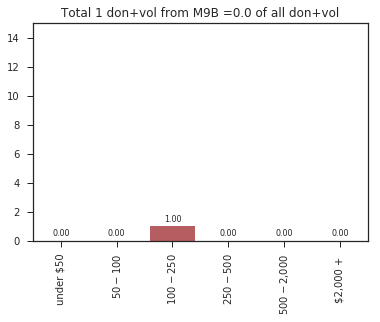

N0B
52


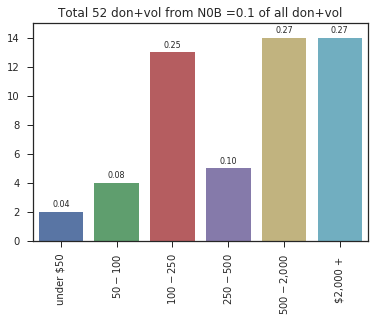

N0E
0
This FSA has no donors+volunteers
------------------------------
N0G
3


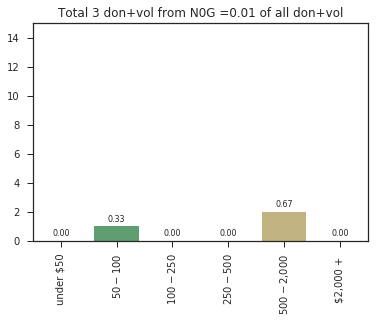

N0J
4


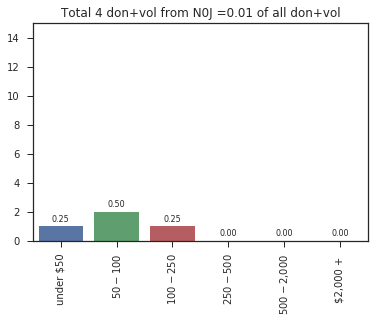

N0K
1


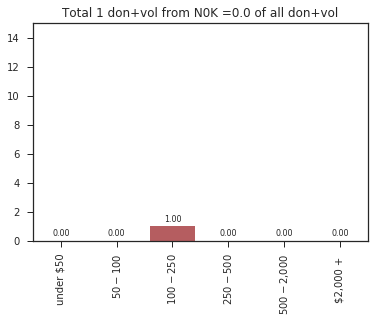

N0N
0
This FSA has no donors+volunteers
------------------------------
N1B
0
This FSA has no donors+volunteers
------------------------------
N1E
0
This FSA has no donors+volunteers
------------------------------
N1G
0
This FSA has no donors+volunteers
------------------------------
N1H
0
This FSA has no donors+volunteers
------------------------------
N1J
0
This FSA has no donors+volunteers
------------------------------
N1K
2


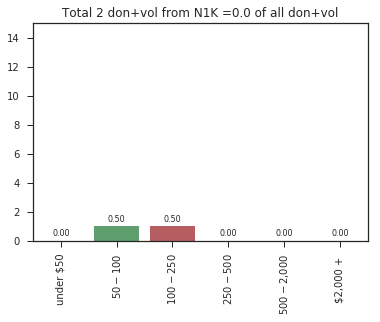

N1M
0
This FSA has no donors+volunteers
------------------------------
N1P
0
This FSA has no donors+volunteers
------------------------------
N1R
1


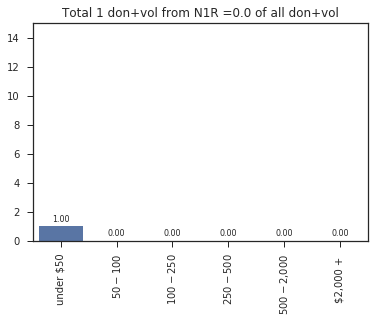

N1S
3


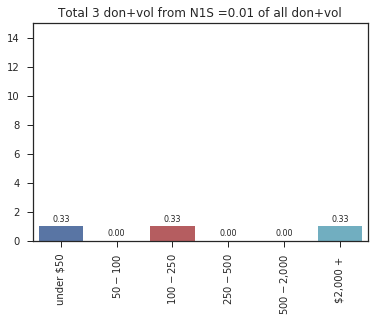

N1T
0
This FSA has no donors+volunteers
------------------------------
N2A
27


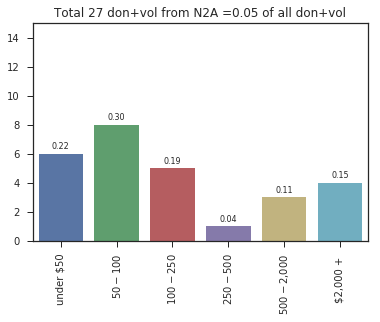

N2B
11


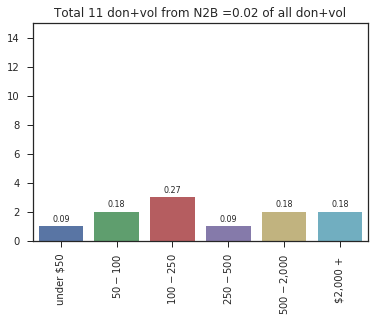

N2C
4


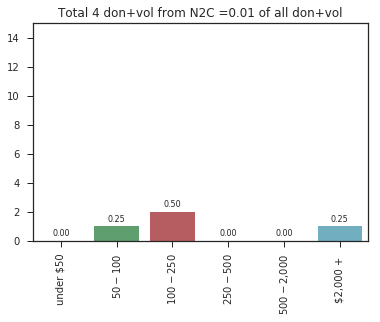

N2E
9


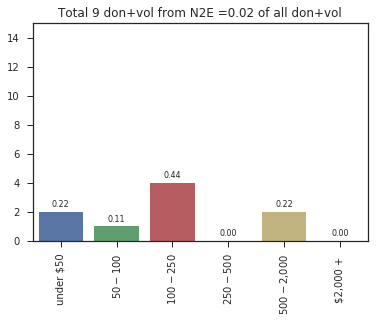

N2G
36


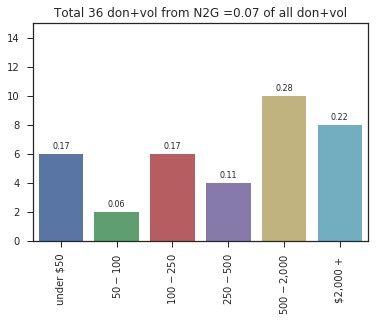

N2H
28


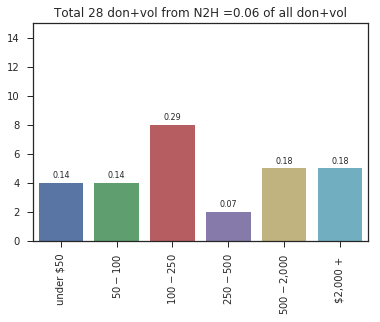

N2J
34


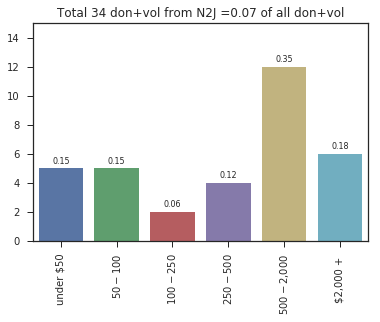

N2K
42


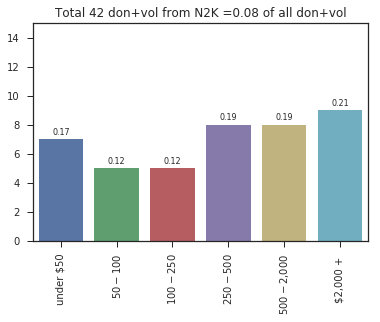

N2L
43


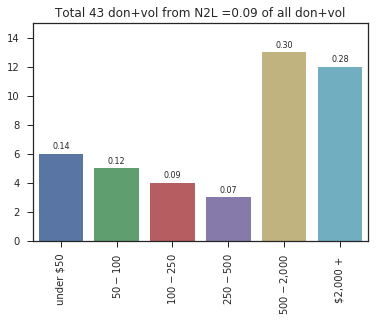

N2M
34


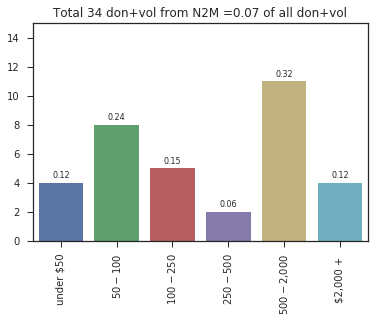

N2N
22


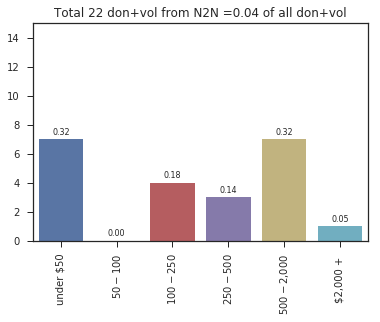

N2P
15


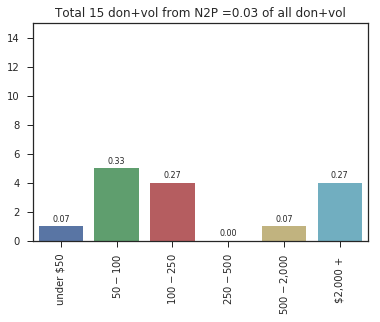

N2R
11


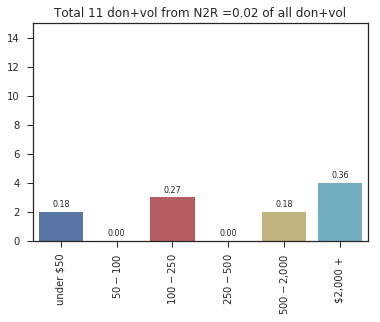

N2S
0
This FSA has no donors+volunteers
------------------------------
N2T
26


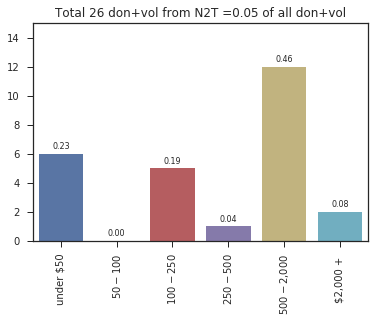

N2V
31


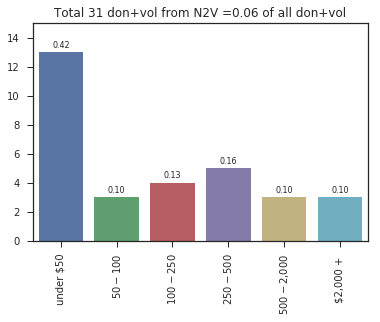

N3A
24


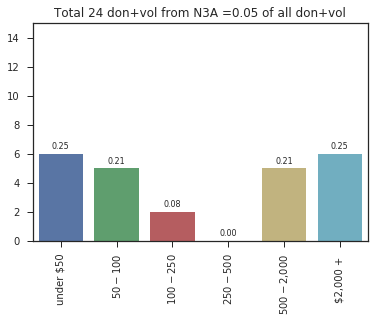

N3B
34


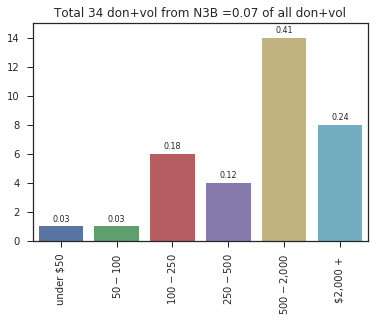

N3C
3


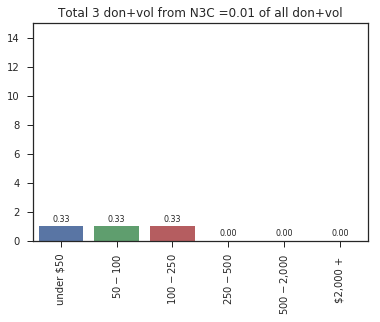

N3G
0
This FSA has no donors+volunteers
------------------------------
N3H
0
This FSA has no donors+volunteers
------------------------------
N3L
0
This FSA has no donors+volunteers
------------------------------
N3R
0
This FSA has no donors+volunteers
------------------------------
N3T
0
This FSA has no donors+volunteers
------------------------------
N4G
0
This FSA has no donors+volunteers
------------------------------
N4S
0
This FSA has no donors+volunteers
------------------------------
N4T
0
This FSA has no donors+volunteers
------------------------------
N4W
1


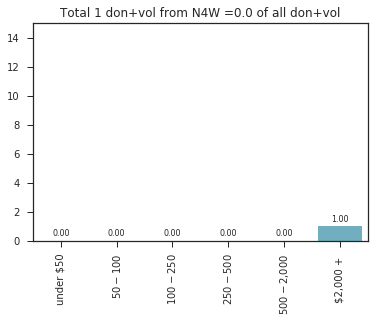

N5A
0
This FSA has no donors+volunteers
------------------------------
N5H
0
This FSA has no donors+volunteers
------------------------------
N5R
1


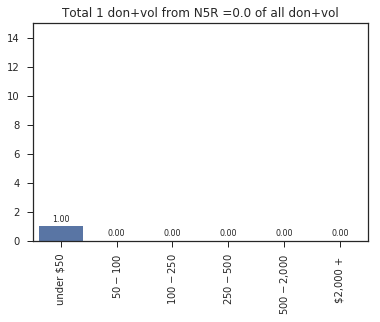

N6G
0
This FSA has no donors+volunteers
------------------------------
N6H
0
This FSA has no donors+volunteers
------------------------------
N6J
0
This FSA has no donors+volunteers
------------------------------
N6K
0
This FSA has no donors+volunteers
------------------------------
N8H
0
This FSA has no donors+volunteers
------------------------------
N8S
0
This FSA has no donors+volunteers
------------------------------
NOB
1


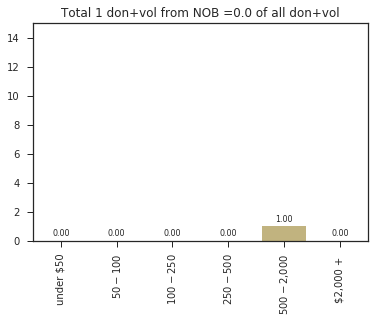

NON
0
This FSA has no donors+volunteers
------------------------------
S7J
0
This FSA has no donors+volunteers
------------------------------
Unknown
0
This FSA has no donors+volunteers
------------------------------


In [170]:
print (len(fsas))
print ('-'*10)

# order = donVolDf['SumDonationsGroup'].unique()
# order = [ str(o) if type(o) == str else 'Unknown' for o in order  ]
# print (order)
# order = list(order)
# order.sort()

order = [ 'under $50', '$50 - $100', '$100 - $250', '$250 - $500', '$500 - $2,000', '$2,000 + ']
print (len(order))

    
for fsa in fsas:
    print (fsa)
    fsaDonVolDf = donVolDf[donVolDf['FSA'] == fsa]
    print (len(fsaDonVolDf))
    if len(fsaDonVolDf) <= 0:
        print ('This FSA has no donors+volunteers')
        print ('-'*30)
        continue
        
    
    counts = [] 
    pers = []
    for o in order:
        temp = fsaDonVolDf[fsaDonVolDf['SumDonationsGroup']==o]
        counts.append(len(temp))
        pers.append(len(temp)/len(fsaDonVolDf))

    g = sns.barplot(x=order, y=counts)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set(ylim=(0, 15))
    
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 0.3,
                '{:1.2f}'.format(height/len(fsaDonVolDf)),
                ha="center",
               fontsize=8
              ) 


    perOfAllDonVol = np.round(len(fsaDonVolDf)/len(donVolDf), 2)
    plt.title('Total ' + str(len(fsaDonVolDf))+' don+vol from ' + str(fsa) + ' ='+str(perOfAllDonVol) + ' of all don+vol')
    plt.show()


# Correlation between number of volunteers and unemployment rate

In [247]:
print (len(fsaDf), len(fsaDf['FSA']))

82 82


In [261]:
fsaDfToNoVolunteers = {}
groups = df.groupby(['FSA'])
for group in groups:
    fsaDfToNoVolunteers[group[0]] = len(group[1])
for fsa in fsaDf['FSA'].unique():
    if fsa not in fsaDfToNoVolunteers:
        print ('This fsa has no volunteers ', fsa)
        fsaDfToNoVolunteers[fsa] = 0
print (len(fsaDfToNoVolunteers), len(fsaDf))


This fsa has no volunteers  nan
82 82


In [265]:
fsaDf['noVolunteers'] = fsaDf['FSA'].map(fsaDfToNoVolunteers)
# fsaDf = fsaDf.dropna(subset=['FSA'])
# fsaDf = fsaDf.dropna(subset=['noVolunteers'])

fsaDf

,FSA,"Population,-2016",age_distribution_0-to-14-years,age_distribution_15-to-64-years,age_distribution_65-years-and-over,age_distribution_85-years-and-over,age_Average-age-of-the-population,age_Median-age-of-the-population,family_%-married-or-living-common-law,family_Average-size-of-census-families,...,"education_%-no-certificate,-diploma-or-degree",education_%-high-school-diploma,"education_%-postsecondary-certificate,-diploma-or-degree",education_%-apprenticeship-or-trades-certificate-or-diploma,education_%-college-certificate-or-diplome,education_%-bachelor-or-above,labour_force_Participation-rate,labour_force_Employment-rate,labour_force_Unemployment-rate,noVolunteers
0,N2A,29858.0,0.186,0.654,0.161,0.020,39.8,39.5,0.595806,3.0,...,0.196436,0.289727,0.513836,0.060377,0.224738,0.210692,0.665,0.622,0.064,122
1,N2G,13407.0,0.110,0.721,0.169,0.025,41.8,38.9,0.447799,2.6,...,0.180243,0.267764,0.551993,0.047227,0.191508,0.299827,0.649,0.596,0.082,123
2,N2V,16900.0,0.192,0.704,0.104,0.017,37.3,38.1,0.635798,3.2,...,0.118619,0.235736,0.645646,0.036036,0.178303,0.409535,0.710,0.658,0.074,106
3,N2L,27758.0,0.121,0.710,0.169,0.026,39.2,33.3,0.466079,2.8,...,0.113381,0.306586,0.580242,0.038766,0.144852,0.377449,0.580,0.532,0.083,190
4,N1T,17670.0,0.211,0.688,0.101,0.010,36.4,36.8,0.634505,3.3,...,0.187545,0.285663,0.526430,0.056481,0.220130,0.225561,0.724,0.679,0.062,17
5,N1G,27330.0,0.149,0.670,0.180,0.033,40.7,39.0,0.556344,2.9,...,0.108460,0.272145,0.619395,0.041750,0.177380,0.381489,0.686,0.640,0.067,4
6,N1R,42210.0,0.163,0.661,0.176,0.023,41.3,41.6,0.549250,2.8,...,0.274686,0.328900,0.396270,0.071563,0.203123,0.109296,0.640,0.594,0.071,38
7,N2C,16111.0,0.148,0.690,0.162,0.023,39.8,37.0,0.504554,2.7,...,0.239442,0.295249,0.464932,0.070513,0.219457,0.159125,0.647,0.592,0.085,85
8,N2K,27253.0,0.188,0.696,0.117,0.012,38.2,39.5,0.629713,3.1,...,0.134070,0.248560,0.617139,0.057821,0.203870,0.340014,0.726,0.691,0.048,143
9,N2M,33221.0,0.162,0.682,0.156,0.020,39.9,38.2,0.526042,2.8,...,0.223129,0.290738,0.486134,0.064528,0.195577,0.210803,0.649,0.595,0.084,134


In [255]:
fsaDf.columns

Index(['FSA', 'Population,-2016', 'age_distribution_0-to-14-years',
       'age_distribution_15-to-64-years', 'age_distribution_65-years-and-over',
       'age_distribution_85-years-and-over',
       'age_Average-age-of-the-population', 'age_Median-age-of-the-population',
       'family_%-married-or-living-common-law',
       'family_Average-size-of-census-families',
       'family_%-census-families-that-are-couples',
       'family_%-couples-with-children',
       'income_Median-employment-income-in-2015-for-full-year-full-time-workers-over-15-($)',
       'income_Average-employment-income-in-2015-for-full-year-full-time-workers-over-15-($)',
       'income_Median-total-income-of-households-in-2015-($)',
       'income_Prevalence-of-low-income-based-on-the-Low-income-measure,-after-tax-(LIM-AT)-(%)',
       'citizenship_%-canadian-citizens', 'citizenship_%-immigrants',
       'dwellings_%-owners', 'dwellings_%-renters',
       'education_%-no-certificate,-diploma-or-degree',
       'e

In [266]:
from scipy.stats import pearsonr
temp = fsaDf[['noVolunteers', 'labour_force_Unemployment-rate']] 
temp = temp.dropna(how='any')
print (pearsonr(temp['noVolunteers'], temp['labour_force_Unemployment-rate']))

(0.06451367232981327, 0.5823919576063479)


In [260]:
from scipy.stats import pearsonr
temp = fsaDf[['noVolunteers', 'labour_force_Employment-rate']] 
temp = temp.dropna(how='any')
print (pearsonr(temp['noVolunteers'], temp['labour_force_Employment-rate']))

(0.09065059205105919, 0.4392467584557038)


In [267]:
from scipy.stats import pearsonr
temp = fsaDf[['noVolunteers', 'citizenship_%-immigrants']] 
temp = temp.dropna(how='any')
print (pearsonr(temp['noVolunteers'], temp['citizenship_%-immigrants']))

(-0.0355492089387067, 0.7620498944779757)


In [268]:
import scipy.stats as stats
tau, p_value=stats.kendalltau(temp['noVolunteers'], temp['citizenship_%-immigrants'])
p_value

0.22217251069076926

# data clustering - doesn't have good results
1. Lets's cluster data based on volunteer attributes, FSA and see what happens

In [178]:
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
% matplotlib notebook

In [179]:
volDf

,VolunteerID,FSA,AgeGroup,YearsVolunteeredGroup,OccasionalVolunteer,RegularVolunteer,Donor,FirstDonationYear,NumberDonations,SumDonationsGroup
0,1,N2A,20 - 29,less than 1,1,0,N,NaN,NaN,NaN
1,2,N2A,unknown,1 - 3 years,1,0,N,NaN,NaN,NaN
2,3,N2G,30 - 39,1 - 3 years,0,1,N,NaN,NaN,NaN
3,4,N2V,30 - 39,less than 1,1,0,N,NaN,NaN,NaN
4,5,N2A,20 - 29,1 - 3 years,0,1,N,NaN,NaN,NaN
5,6,N2L,40 - 49,less than 1,1,0,N,NaN,NaN,NaN
6,7,N2L,20 - 29,less than 1,1,0,N,NaN,NaN,NaN
7,8,N1T,50 - 59,less than 1,1,0,N,NaN,NaN,NaN
8,9,N1G,30 - 39,less than 1,1,0,N,NaN,NaN,NaN
9,10,N1R,30 - 39,less than 1,1,0,N,NaN,NaN,NaN


In [180]:
volDf.columns

Index(['VolunteerID', 'FSA', 'AgeGroup', 'YearsVolunteeredGroup',
       'OccasionalVolunteer', 'RegularVolunteer', 'Donor', 'FirstDonationYear',
       'NumberDonations', 'SumDonationsGroup'],
      dtype='object')

In [213]:
colsToConsider = [
    'AgeGroup', 'YearsVolunteeredGroup',
   'OccasionalVolunteer', 'Donor'
]
colsToConsider += list(fsaDf.columns)
colsToConsider.remove('FSA')
print (colsToConsider)

['AgeGroup', 'YearsVolunteeredGroup', 'OccasionalVolunteer', 'Donor', 'Population,-2016', 'age_distribution_0-to-14-years', 'age_distribution_15-to-64-years', 'age_distribution_65-years-and-over', 'age_distribution_85-years-and-over', 'age_Average-age-of-the-population', 'age_Median-age-of-the-population', 'family_%-married-or-living-common-law', 'family_Average-size-of-census-families', 'family_%-census-families-that-are-couples', 'family_%-couples-with-children', 'income_Median-employment-income-in-2015-for-full-year-full-time-workers-over-15-($)', 'income_Average-employment-income-in-2015-for-full-year-full-time-workers-over-15-($)', 'income_Median-total-income-of-households-in-2015-($)', 'income_Prevalence-of-low-income-based-on-the-Low-income-measure,-after-tax-(LIM-AT)-(%)', 'citizenship_%-canadian-citizens', 'citizenship_%-immigrants', 'dwellings_%-owners', 'dwellings_%-renters', 'education_%-no-certificate,-diploma-or-degree', 'education_%-high-school-diploma', 'education_%-pos

In [237]:
# X = volDf[colsToConsider]
X = df[colsToConsider]

AgeGroupOrdinalMap = {
    'under 20':18,
    '20 - 29':25,
    '30 - 39':35,
    '40 - 49':45,
    '50 - 59':55,
    '60 - 69':65, 
}
X = X.dropna(how='any')
X = X[~ (X['AgeGroup']=='unknown') ].reset_index(drop=True)
X['AgeGroupNumeric'] = X['AgeGroup'].map(AgeGroupOrdinalMap)
X = X.drop(columns=['AgeGroup'])

YrsVolGroupOrdinalMap = {
    'less than 1':1,
    '1 - 3 years':2,
    '5 - 10 years':7.5,
}
# X = X[~ (X['AgeGroup']=='unknown') ].reset_index(drop=True)
X['YearsVolunteeredGroupNumeric'] = X['YearsVolunteeredGroup'].map(YrsVolGroupOrdinalMap)
X = X.drop(columns=['YearsVolunteeredGroup'])

saveXY = X.copy()

y = X['Donor']
X = X.drop(columns=['Donor'])
X = X.dropna(how='any').reset_index(drop=True)

for col in X.columns:
    X[col] = X[col].astype(float)

In [238]:
X.to_csv('temp.csv')

In [239]:
X

,OccasionalVolunteer,"Population,-2016",age_distribution_0-to-14-years,age_distribution_15-to-64-years,age_distribution_65-years-and-over,age_distribution_85-years-and-over,age_Average-age-of-the-population,age_Median-age-of-the-population,family_%-married-or-living-common-law,family_Average-size-of-census-families,...,education_%-high-school-diploma,"education_%-postsecondary-certificate,-diploma-or-degree",education_%-apprenticeship-or-trades-certificate-or-diploma,education_%-college-certificate-or-diplome,education_%-bachelor-or-above,labour_force_Participation-rate,labour_force_Employment-rate,labour_force_Unemployment-rate,AgeGroupNumeric,YearsVolunteeredGroupNumeric
0,1.0,29858.0,0.186,0.654,0.161,0.020,39.8,39.5,0.595806,3.0,...,0.289727,0.513836,0.060377,0.224738,0.210692,0.665,0.622,0.064,25.0,1.0
1,0.0,13407.0,0.110,0.721,0.169,0.025,41.8,38.9,0.447799,2.6,...,0.267764,0.551993,0.047227,0.191508,0.299827,0.649,0.596,0.082,35.0,2.0
2,1.0,16900.0,0.192,0.704,0.104,0.017,37.3,38.1,0.635798,3.2,...,0.235736,0.645646,0.036036,0.178303,0.409535,0.710,0.658,0.074,35.0,1.0
3,0.0,29858.0,0.186,0.654,0.161,0.020,39.8,39.5,0.595806,3.0,...,0.289727,0.513836,0.060377,0.224738,0.210692,0.665,0.622,0.064,25.0,2.0
4,1.0,27758.0,0.121,0.710,0.169,0.026,39.2,33.3,0.466079,2.8,...,0.306586,0.580242,0.038766,0.144852,0.377449,0.580,0.532,0.083,45.0,1.0
5,1.0,27758.0,0.121,0.710,0.169,0.026,39.2,33.3,0.466079,2.8,...,0.306586,0.580242,0.038766,0.144852,0.377449,0.580,0.532,0.083,25.0,1.0
6,1.0,17670.0,0.211,0.688,0.101,0.010,36.4,36.8,0.634505,3.3,...,0.285663,0.526430,0.056481,0.220130,0.225561,0.724,0.679,0.062,55.0,1.0
7,1.0,27330.0,0.149,0.670,0.180,0.033,40.7,39.0,0.556344,2.9,...,0.272145,0.619395,0.041750,0.177380,0.381489,0.686,0.640,0.067,35.0,1.0
8,1.0,42210.0,0.163,0.661,0.176,0.023,41.3,41.6,0.549250,2.8,...,0.328900,0.396270,0.071563,0.203123,0.109296,0.640,0.594,0.071,35.0,1.0
9,1.0,13407.0,0.110,0.721,0.169,0.025,41.8,38.9,0.447799,2.6,...,0.267764,0.551993,0.047227,0.191508,0.299827,0.649,0.596,0.082,35.0,1.0


In [227]:
y

0       N
1       N
2       N
3       N
4       N
5       N
6       N
7       N
8       N
9       Y
10      N
11      Y
12      N
13      N
14      Y
15      Y
16      Y
17      Y
18      N
19      N
20      N
21      N
22      N
23      N
24      N
25      N
26      N
27      Y
28      Y
29      N
       ..
1641    N
1642    N
1643    N
1644    N
1645    N
1646    N
1647    N
1648    Y
1649    N
1650    N
1651    Y
1652    N
1653    N
1654    N
1655    N
1656    N
1657    N
1658    N
1659    N
1660    N
1661    N
1662    Y
1663    N
1664    N
1665    N
1666    Y
1667    N
1668    N
1669    N
1670    N
Name: Donor, Length: 1671, dtype: object

[0.6298431  0.28035175]


<IPython.core.display.Javascript object>


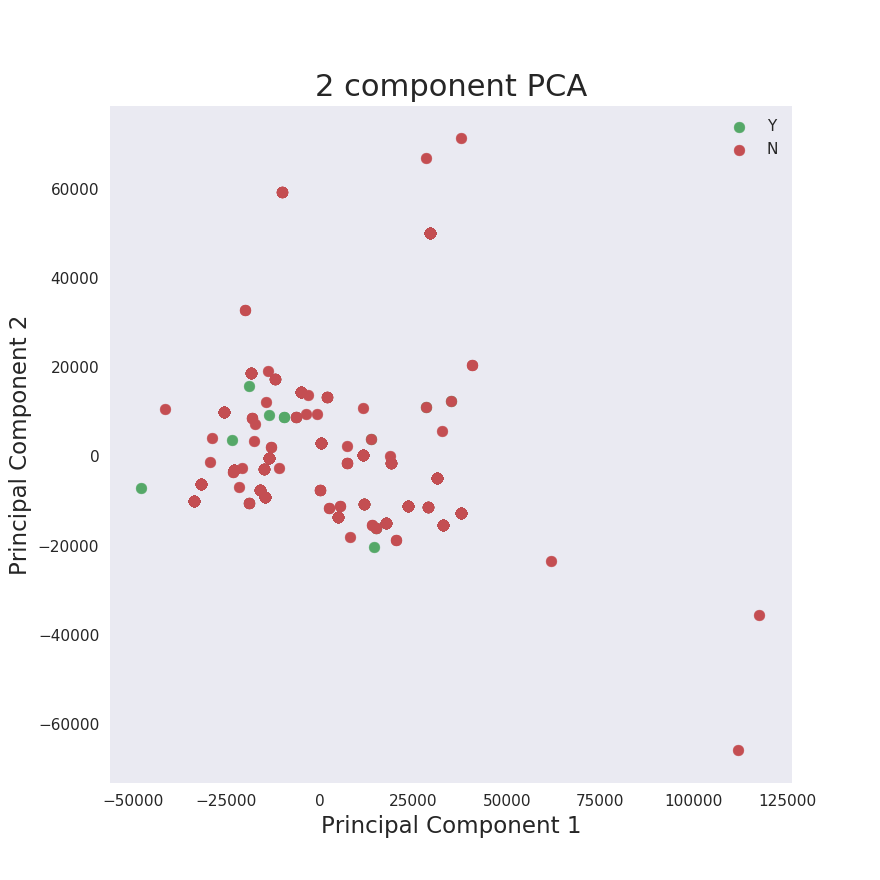

In [245]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print (pca.explained_variance_ratio_)

finalDf = pd.concat([principalDf, y], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [ 'Y', 'N' ]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Donor'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])


finalDf = pd.concat([principalDf, y], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [ 'Y', 'N' ]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Donor'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
